# 1. Introduction to the Data Set

The dataset for this project contains the number of bike rentals per hour over a period of about 2 years. In addition to the number of rentals, the dataset contains the date, season of the year, temperature, humidity, windspeed, and whether the day was a holiday, weekday, or working day. The goal of the project is to predict the number of rentals on a given day using a few different machine learning models and evaluating their performance. Let's start by importing some packages and getting familiar with the data.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context('notebook')
%matplotlib inline

In [61]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Looking at the histogram of the rentals below, we can see that it follows the distribution we might expect: mostly lower numbers tapering off toward higher number.

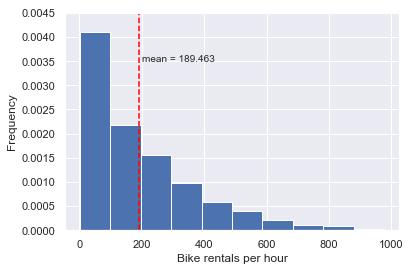

In [96]:
mean_bikes = bike_rentals['cnt'].mean()
bike_rentals['cnt'].plot(kind='hist', density=True)
plt.ylim(0, 0.0045)
plt.vlines(mean_bikes, -1, 1, colors='red', linestyles='dashed')
plt.text(mean_bikes+10, 0.0035, 'mean = {:g}'.format(mean_bikes))
plt.xlabel('Bike rentals per hour')
plt.show()

Now let's look at a correlation of the features in the dataset to see what features correlate with the number of rentals and would be good to use for our prediction later.

In [63]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


# 2. Calculating Features

The data in the `hr` column would be more helpful if we instead divide the day up into morning, afternoon, evening, and night. Let's write a function to do that. The new column will be called `time_label`, and we will encode:
- afternoon = 1
- evening = 2
- night = 3
- morning = 4

In [64]:
def assign_label(hr):
    if hr < 6:
        return 4
    elif hr < 12:
        return 1
    elif hr < 18:
        return 2
    else:
        return 3

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

# 3. Splitting the Data Into Train and Test Sets

Now we'll split the data into a training set and a test set. We'll use 80% of the data for training, and the remaining 20% for testing.

We'll also choose to use Root-Mean-Square Error (RMSE) as our error metric. We use this because MSE is a fairly standard error metric for machine learning regression, and RMSE makes the units of the error the same as the units of the quantity being predicted.

In [65]:
from sklearn.metrics import mean_squared_error

# Using this to be able to change the metric later if we want.
def error(true, predict):
    return np.sqrt(mean_squared_error(true, predict))

In [66]:
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

# 4. Applying Linear Regression

We're going to try using linear regression first. Linear regression tends to resist overfitting, and can work because a lot of our features were linearly correlated with the number of rentals, but it does also tend to underfit.

Our target column is `cnt`, the number of rentals. We omit `casual` and `registered`, because those are the two different kinds of rentals (`cnt` = `casual` + `registered`). We also omit `instant` because it's just an identifier for the rows and `dteday` because it is basically the same information as `instant` and because most of the date information is in the `yr` and `mnth` columns

In [67]:
features = []
for col in bike_rentals.columns:
    if col not in ['cnt', 'casual', 'registered', 'dteday', 'instant']:
        features.append(col)

In [82]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(train[features], train['cnt'])

lin_pred = lin.predict(test[features])

lin_err = error(test['cnt'], lin_pred)
print('Linear regression RMSE =', lin_err)

Linear regression RMSE = 127.27063301419872


The RMSE with linear regression is about 130 bikes per hour, which is really bad. We can see this better by plotting our linear regression prediction along with the actual values. We can see that linear regression tends to take very low values, and often is actually negative. Plotting the difference between the two shows that the difference between the actual value and the predictions is frequently over 200, and often near 600.

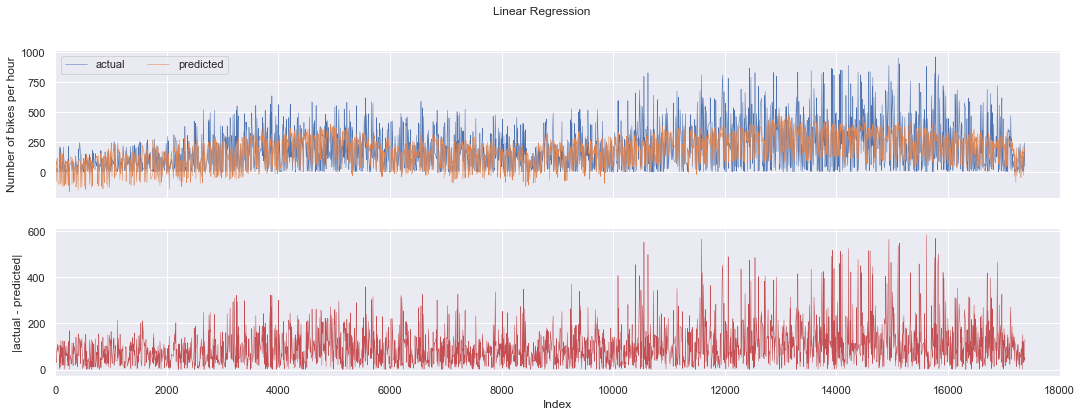

In [139]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6), sharex=True)
ax1.plot(test.index, test['cnt'], test.index, lin_pred, lw=0.5)
ax1.set_ylabel('Number of bikes per hour')
ax1.legend(['actual', 'predicted'], loc='best', ncol=2)
ax2.plot(test.index, np.abs(test['cnt']-lin_pred), 'r', lw=0.5)
ax2.set_ylabel('|actual - predicted|')
ax2.set_xlim(0, 18000)
ax2.set_xlabel('Index')
fig.suptitle('Linear Regression')
plt.show()

Linear regression is not a very good predictor!

# 5. Applying Decision Trees

Now let's try applying a decision tree to this data.

In [117]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(train[features], train['cnt'])

tree_pred = tree.predict(test[features])
tree_err = error(test['cnt'], tree_pred)

print('Tree RMSE =', tree_err)

Tree RMSE = 59.47100968135767


With this quick decision tree model, we've already reduced the RMSE down to about 60 bikes per hour. Plotting the actual and predicted values and their differences below, we can see that the actual and predicted values track much more closely and that the difference is rarely over 200.

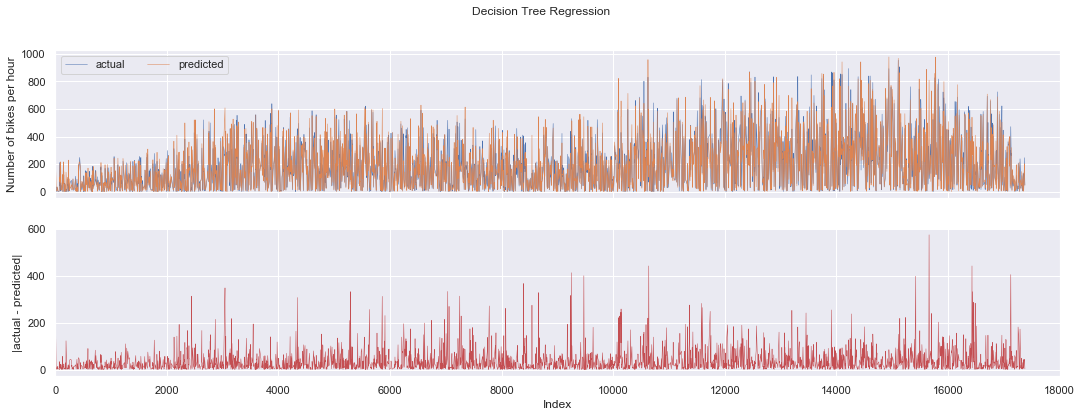

In [137]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6), sharex=True)
ax1.plot(test.index, test['cnt'], test.index, tree_pred, lw=0.5)
ax1.set_ylabel('Number of bikes per hour')
ax1.legend(['actual', 'predicted'], loc='best', ncol=2)
ax2.plot(test.index, np.abs(test['cnt']-tree_pred), 'r', lw=0.5)
ax2.set_ylabel('|actual - predicted|')
ax2.set_xlim(0, 18000)
ax2.set_xlabel('Index')
fig.suptitle('Decision Tree Regression')
plt.show()

# 6. Applying Random Forests

Lastly, we use a random forest model. The RMSE error ends up being much lower, at about 43 bikes per hour. The difference between the prediction and the actual value is usually below 100 and never exceeds 400

In [83]:
from sklearn.ensemble import RandomForestRegressor

rando = RandomForestRegressor()
rando.fit(train[features], train['cnt'])

rand_pred = rando.predict(test[features])
rando_err = error(test['cnt'], rand_pred)
print('Random forest RMSE =', rando_err)

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random forest RMSE = 43.489331987139145


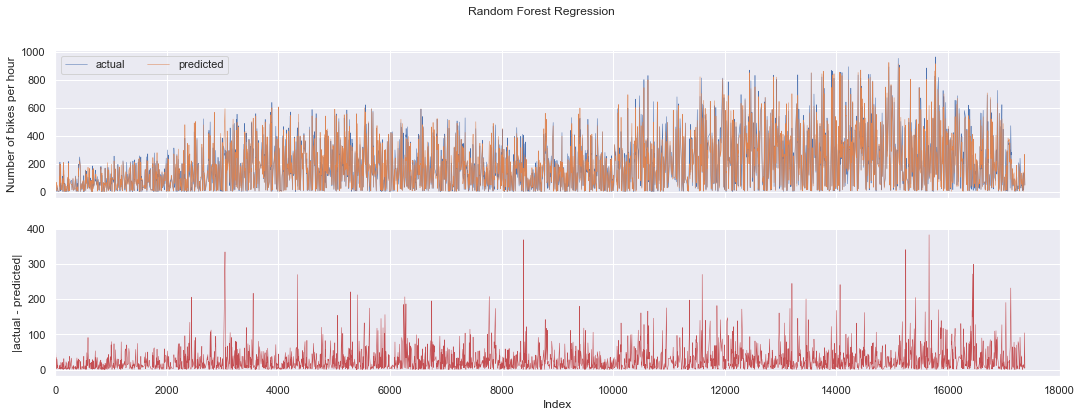

In [138]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 6), sharex=True)
ax1.plot(test.index, test['cnt'], test.index, rand_pred, lw=0.5)
ax1.set_ylabel('Number of bikes per hour')
ax1.legend(['actual', 'predicted'], loc='best', ncol=2)
ax2.plot(test.index, np.abs(test['cnt']-rand_pred), 'r', lw=0.5)
ax2.set_ylabel('|actual - predicted|')
ax2.set_xlim(0, 18000)
ax2.set_xlabel('Index')
fig.suptitle('Random Forest Regression')
plt.show()